In [15]:
import torch
from torchvision.models import AlexNet
import matplotlib.pyplot as plt
import numpy as np

In [27]:
epochs = 50
steps_per_epoch = 1900

/home/wanxuan/miniconda3/envs/torch/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


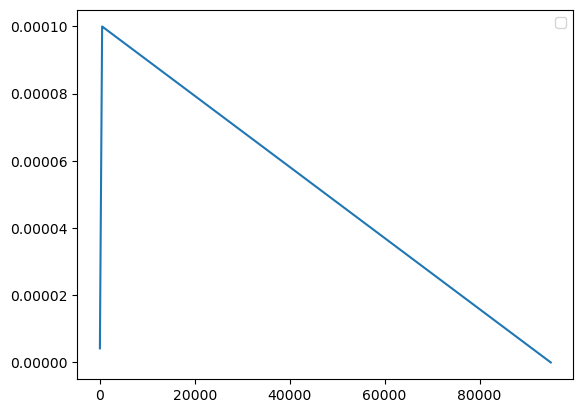

In [28]:
steps = []
lrs = []
model = AlexNet(num_classes=2)
lr = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.0001,epochs=epochs,steps_per_epoch=steps_per_epoch,pct_start=0.005,cycle_momentum=False,anneal_strategy='linear')

for epoch in range(epochs):
    for batch in range(steps_per_epoch):
        scheduler.step()
        lrs.append(scheduler.get_last_lr()[0])
        steps.append(epoch * 1900 + batch)

plt.figure()
plt.legend()
plt.plot(steps, lrs, label='OneCycle')
plt.show()

In [16]:
maxIndex = np.argmax(lrs)
steps[maxIndex]

473

In [25]:
50*1900*0.005

475.0